In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gizmo_analysis as gizmo 
import utilities as ut
from sl_utilities import distinct_colours as dc
from fof_analysis import fof
import matplotlib.colors as colors
#from sl_utilities import load_pickle_dict
#from sl_utilities import read_pickles
#from sl_utilities import cp_dict
from importlib import reload
from scipy import stats
from matplotlib import rc #to use Latex math symbols like 'phi'


import pickle
import astropy
from astropy.io import ascii

#to get metallicity for clusters later
#m12i_cluster_dict, m12i_complex_dict, m12f_cluster_dict, m12f_complex_dict, m12m_cluster_dict, m12m_complex_dict = read_pickles.get_final_dict()



In [2]:
!hostname

c506-063.stampede2.tacc.utexas.edu


In [4]:
#simname = 'm12m.res7100'

simname = 'm12f_res7100_mhdcv'
snapnumber=591
simtype="fire2"  #this is the simtype eg. fire2, fire3, sf-fire3, sf-fire3-alpha01, sf-fire3-alpha03, sf-fire3-alpha05 
simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/'

#part = gizmo.io.Read.read_snapshots(['star'], 'redshift', 0, assign_host_principal_axes=True, simulation_name=simname, simulation_directory=simdir+simname)

#part = gizmo.io.Read.read_snapshots(['all'],'redshift', 0,'snapshot_index', snapnumber, simulation_name=simname, simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)  

part = gizmo.io.Read.read_snapshots(['all'],'snapshot_index', snapnumber, simulation_name=simname, simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)

species='star'


# in utilities.simulation.Snapshot():
* reading:  scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/snapshot_times.txt

  using snapshot index = 591, redshift = 0.008


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/output/snapshot_591.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 81363848 particles
    dark2     (id = 2): 7086235 particles
    gas       (id = 0): 64172385 particles
    star      (id = 4): 17778786 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['dark', 'dark2', 'gas', 'star']
  gas properties: ['density', 'electron.fraction', 'hydrogen.neutral.fraction', 'id', 'id.child', 'id.generation', 'magnetic.field', 'mass', 'massfraction', 'position', 'sfr', 'size', 'temperature', 'velocity']

* reading particles from:
    scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/output/snapsho

In [5]:
x = part[species].prop('host.distance.principal')[:,0]
y = part[species].prop('host.distance.principal')[:,1]
z = part[species].prop('host.distance.principal')[:,2]
vx = part[species].prop('host.velocity.principal')[:,0]
vy = part[species].prop('host.velocity.principal')[:,1]
vz = part[species].prop('host.velocity.principal')[:,2]

mass = part[species].prop('mass')
massi = part[species].prop('form.mass')
feh = part[species].prop('metallicity.fe')
feh = np.array(feh)
    
age = part[species].prop('age')
age = np.array(age)
r = np.sqrt(x**2 + y**2 + z**2)
young = 0.003


# in gizmo_analysis.gizmo_star.MassLoss():
* generating 2-D spline to compute stellar mass loss from age + metallicity
  number of age bins = 20
  number of metallicity bins = 25


In [6]:
keep = np.where((age <= .003) & (r < 20) & (r > 2) & (abs(z) < 1.5))
m50  = np.where((age <= 0.050) & (r < 20) & (abs(z) < 1.5))
m1000 = np.where((age <= 1) & (r < 20) & (abs(z) < 1.5))

mass_m50 = mass[m50]
x_m50 = x[m50]
y_m50 = y[m50]
z_m50 = z[m50]
r_m50 = r[m50]
age_m50 = age[m50]
feh_m50 = feh[m50]

mass_m1000 = mass[m1000]
x_m1000 = x[m1000]
y_m1000 = y[m1000]
z_m1000 = z[m1000]
r_m1000 = r[m1000]
age_m1000 = age[m1000]
feh_m1000 = feh[m1000]

xkeep   = x[keep]
ykeep   = y[keep]
zkeep   = z[keep]
mkeep   = mass[keep]
mikeep  = massi[keep]
vxkeep  = vx[keep]
vykeep  = vy[keep]
vzkeep  = vz[keep]
rkeep   = r[keep]
agekeep = age[keep]
fehkeep = feh[keep]

In [7]:
print(np.max(feh_m1000))
print(np.min(feh_m1000))

0.53529954
-0.5494762


In [8]:
#ind1, xcm1, ycm1, zcm1, mtot1, grpid1, r901, r501, rmax1 = fof.find(xkeep,ykeep,zkeep,b=.01, mass=mkeep, ncut=5)
ind2, xcm2, ycm2, zcm2, mtot2, grpid2, r902, r502, rmax2 = fof.find(xkeep,ykeep,zkeep,b=.018, mass=mkeep, ncut=5)

#dict1 = cp_dict.get_dict(ind1, xcm1, ycm1, zcm1, mtot1, grpid1, r901, r501, rmax1, xkeep, ykeep, zkeep, mkeep, vxkeep, vykeep, vzkeep, rkeep, agekeep, fehkeep, mikeep)
#dict2 = cp_dict.get_dict(ind2, xcm2, ycm2, zcm2, mtot2, grpid2, r902, r502, rmax2, xkeep, ykeep, zkeep, mkeep, vxkeep, vykeep, vzkeep, rkeep, agekeep, fehkeep, mikeep)

#----------------------------------------------------------------------------------------------------
#do histogram work outside of plot
bin_edge = 15 #how far out in the disk
width = .2 #sam: 100-200 pc for pretty pics, 750 for analysis 
ksbin = np.arange(-1.*(bin_edge)+width/2.,(bin_edge)+width/2.,width) 

den, xh, yh = np.histogram2d(y_m1000, x_m1000, weights=mass_m1000, bins=[ksbin, ksbin]) #good stars & histogram line up now <--  x & y have to be inverted in histogram
feh2, xedges2, yedges2, bin2 = stats.binned_statistic_2d(x_m1000, y_m1000, feh_m1000, 'mean', bins=[ksbin,ksbin])
m2 = np.ma.masked_where(den < 30000,  feh2) #masks below cut

#density peaks of young (< 50 Myr) stars: shows spiral structure 
cbin_edge = 15 
cwidth = .4 
cksbin = np.arange(-1.*(cbin_edge)+cwidth/2.,(cbin_edge)+cwidth/2.,cwidth) 

cden, cxh, cyh = np.histogram2d(y_m50, x_m50, weights=mass_m50, bins=[cksbin, cksbin])

linking length  0.018
min number particles in group  5
0.14223504066467285 seconds
number of groups 95
max number in a group 46


In [9]:
feh_means_clusters=list()
for grpid in range(len(ind2)):
    mean_temp=np.mean(feh[keep][ind2[grpid]])
    feh_means_clusters.append(mean_temp)
    

In [10]:
#getting the time
snapshot_times = simdir + 'snapshot_times.txt'
snaptime_data = astropy.io.ascii.read(snapshot_times, guess=False, comment="#")
snaptime_data = np.genfromtxt(snapshot_times, usecols=(0,3), skip_header=4, dtype=float) #the first and fourth columns are the only ones we need 
snaps = np.array(snaptime_data[:,0]) #col1 = first column saved from text file #This is a collection of all snapshot nos.
times = np.array(snaptime_data[:,1]) #col4 = second column saved #This is a collection of times 
snaptime = times[np.where(snaps == snapnumber)][0] #time of snapshot in Gyr
print("The snaptime is:",snaptime)
timelabel='t=' + f'{snaptime:.3f}' + ' Gyr'


The snaptime is: 13.692652471


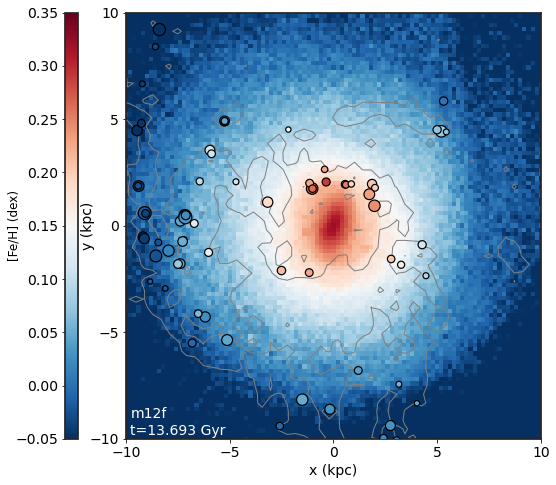

In [12]:
#PLOTTING
plot_comps={}
bkg_metal_contour_data={}
bkg_cluster_data={}

fig = plt.figure()
fig.set_size_inches(8,8)
#fig.subplots_adjust(wspace=.25, hspace=.25)

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.75

ax1 = fig.add_subplot(111)
#ax2 = plt.subplot2grid((1, 2), (0, 1))
ax1.set_aspect('equal')

#ax1 = fig.add_axes([0.07, 0.1, 0.85, 0.85]) #left, bottom, width, height 

ax1.set_xlabel('x (kpc)', fontsize=14)
ax1.set_ylabel('y (kpc)', fontsize=14, labelpad=-5)
ax1.set_xlim(-10, 10) 
ax1.set_ylim(-10, 10)
ax1.set_yticks([-10,-5,0,5,10])
ax1.set_xticks([-10,-5,0,5,10])


im1 = ax1.imshow(m2, interpolation='nearest', origin='lower', extent=[xedges2[0],xedges2[-1],yedges2[0],yedges2[-1]], cmap = plt.cm.get_cmap('RdBu_r'), aspect='auto', vmin=-.05, vmax=0.35)
extent_arr=[xedges2[0],xedges2[-1],yedges2[0],yedges2[-1]]

#im = ax.imshow(den/(width**2), interpolation='nearest',extent=(-1.*bin_edge,bin_edge,-1.*bin_edge,bin_edge), origin='lower', vmin=1e3, vmax=5e7, norm=colors.LogNorm(), cmap='pink')
#cb.set_label(r'$\Sigma_{*}$ (M$_{\odot}$/pc$^2$)')

ax1.contour(cden,extent=[cxh[0],cxh[-1],cyh[0],cyh[-1]], linewidths=[1], colors='gray', levels = [1.1e5])
contour_extent=[cxh[0],cxh[-1],cyh[0],cyh[-1]]

#colorbar same for image and complexes
#mean_feh = dict2['mean_feh'] #calculate the mean of each cluster
#xcm = dict2['xcm']
#ycm = dict2['ycm']
#rmax = np.array(dict2['rmax'])*1000.


mean_feh = feh_means_clusters #calculate the mean of each cluster
xcm = xcm2
ycm = ycm2
rmax = np.array(rmax2)*1000.



im1 = ax1.scatter(xcm, ycm, c=mean_feh, cmap=plt.cm.get_cmap('RdBu_r'), vmin=-.05,vmax=0.35, marker='o', s=rmax*4, zorder=100, edgecolor='black', linewidth=1.2)

ax1.text(-9.8,-9,'m12f', color='white', fontsize=14)
ax1.text(-9.8,-9.8,timelabel, color='white', fontsize=14)

ax1.set_facecolor("black")


fig.subplots_adjust(left=0.18, bottom=0.14)
#cbar_ax = fig.add_axes([0.84, 0.1, 0.05, 0.85]) #left, bottom, width, height
cbar_ax = fig.add_axes([0.074, 0.14, 0.022, 0.74])
cb = fig.colorbar(im1, cax=cbar_ax, ticklocation='left')
cb.set_label('[Fe/H] (dex)', labelpad=-5, fontsize=12)

'''
#--------------------------------------------------------------------------------
ax2.set_xlabel('x (kpc)', fontsize=14)
ax2.set_ylabel('y (kpc)', fontsize=14, labelpad=-5)
ax2.set_xlim(-5, 5) 
ax2.set_ylim(-5, 5)


im2 = ax2.imshow(m2i, interpolation='nearest', origin='low', extent=[ixedges2[0],ixedges2[-1],iyedges2[0],iyedges2[-1]], cmap = plt.cm.get_cmap('RdBu_r'), aspect='auto', vmin=-.3, vmax=0.5)

ax2.contour(icden,extent=[icxh[0],icxh[-1],icyh[0],icyh[-1]], linewidths=[1], colors='gray', levels = [1.1e5])

#colorbar same for image and complexes
#imean_feh = idict2['mean_feh']
#ixcm = idict2['xcm']
#iycm = idict2['ycm']
#irmax = np.array(idict2['rmax'])*1000.

imean_feh = idict2['mean_feh']
ixcm = xcm2
iycm = ycm2
irmax = np.array(rmax2)*1000.

im2 = ax2.scatter(ixcm, iycm, c=imean_feh, cmap=plt.cm.get_cmap('RdBu_r'), vmin=-.3,vmax=0.5, marker='o', s=irmax*2, zorder=100, edgecolor='black', linewidth=1.2)

ax2.text(10.7,13.7,'m12i', color='white', fontsize=9.5)
'''
plt.savefig(simname+'metallicity_distribution_clusters_585.jpg',dpi=150,bbox_inches="tight")
plt.savefig(simname+'metallicity_distribution_clusters_585.png',dpi=150,transparent=True,bbox_inches="tight")

#plt.close()
#plt.clf()

bkg_metal_contour_data.update({"snapnumber":snapnumber,"snaptime":snaptime,"m2":m2,"extent_arr":extent_arr})
bkg_metal_contour_data.update({"cden":cden,"contour_extent":contour_extent})
bkg_cluster_data.update({"xcm":xcm,"ycm":ycm,"rmax":rmax,"mean_feh":mean_feh})

plot_comps.update({"contour_data":bkg_metal_contour_data,"cluster_data":bkg_cluster_data})

#####Export the plot comps to a pickle#####
path="./"
file_name=simname[:4]+"_background_metal_contour_plots.pkl"
with open(path+file_name, 'wb') as output:
    # Pickle dictionary using protocol 0.
    pickle.dump(plot_comps, output)

